# Run coloc-susie for structural variant-tagged regions
- locus 20 (ADHD), 3p21.31
- MST1R: ENSG00000164078
- CAMKV: ENSG00000164076

- update 5/13/2023: see `scripts/coloc.R` for final

In [1]:
library(coloc)
library(data.table)
library(dplyr)

This is a new update to coloc.


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [25]:
# data(coloc_test_data)
# attach(coloc_test_data)

In [2]:
setwd("../out/locus20/")

### preparing coloc datasets

In [3]:
mst1r <- read.table("ENSG00000164078_all_pairs.txt")

In [4]:
mst1r_snps <- read.table("ENSG00000164078_snps.txt")
# head(mst1r_snps)

In [5]:
head(mst1r)

,V1,V2,V3,V4,V5,V6,V7,V8,V9
,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,ENSG00000164078,rs7432782,-999755,41,44,0.0349762,0.20141400,0.1457090,0.1139130
2,ENSG00000164078,rs139709184,-999536,17,17,0.0135135,0.38806800,-0.1687980,0.1954050
3,ENSG00000164078,rs34477108,-999524,89,95,0.0755167,0.40151300,-0.0706257,0.0841185
4,ENSG00000164078,rs145694276,-999311,24,24,0.0190779,0.81909500,-0.0382287,0.1670660
5,ENSG00000164078,rs147720068,-998725,20,21,0.0166932,0.18560800,0.2252780,0.1699700
6,ENSG00000164078,rs113031600,-996987,24,26,0.0206677,0.00783979,0.4016830,0.1504970


In [6]:
mst1r <- mst1r %>% filter(V2 %in% mst1r_snps$V1)

In [10]:
locus_bim <- read.table("../../data/index_snps_ld_matrices/IndexSNPsRegions_3_48910084_50910084.bim")
# head(locus_bim)

In [11]:
mst1r <- mst1r %>% inner_join(locus_bim, by = "V2")
# head(mst1r)

In [13]:
mst1r_ld <- fread("ENSG00000164078.ld", data.table = F)

In [14]:
colnames(mst1r_ld) <- mst1r_snps$V1
rownames(mst1r_ld) <- mst1r_snps$V1

In [15]:
data_mst1r <- list("beta" = mst1r$V8, "varbeta" = mst1r$V9*mst1r$V9, "snp" = mst1r$V2,
                  "position" = mst1r$V4.y, "type" = "quant", "sdY" = 1, "LD" = as.matrix(mst1r_ld))

In [16]:
check_dataset(data_mst1r,warn.minp=1e-10)

NULL

In [12]:
camkv <- read.table("ENSG00000164076_all_pairs.txt")
camkv_snps <- read.table("ENSG00000164076_snps.txt")
camkv <- camkv %>% filter(V2 %in% camkv_snps$V1)
camkv <- camkv %>% inner_join(locus_bim, by = "V2")
camkv_ld <- fread("ENSG00000164076.ld", data.table = F)
colnames(camkv_ld) <- camkv_snps$V1
rownames(camkv_ld) <- camkv_snps$V1

In [13]:
data_camkv <- list("beta" = camkv$V8, "varbeta" = camkv$V9*camkv$V9, "snp" = camkv$V2,
                  "position" = camkv$V4.y, "type" = "quant", "sdY" = 1, "LD" = as.matrix(camkv_ld))

In [14]:
check_dataset(data_camkv, warn.minp = 1e-10)

Warning message in check_dataset(data_camkv, warn.minp = 1e-10):
“minimum p value is: 1.6472e-07
If this is what you expected, this is not a problem.
If this is not as small as you expected, please check the 02_data vignette.”


NULL

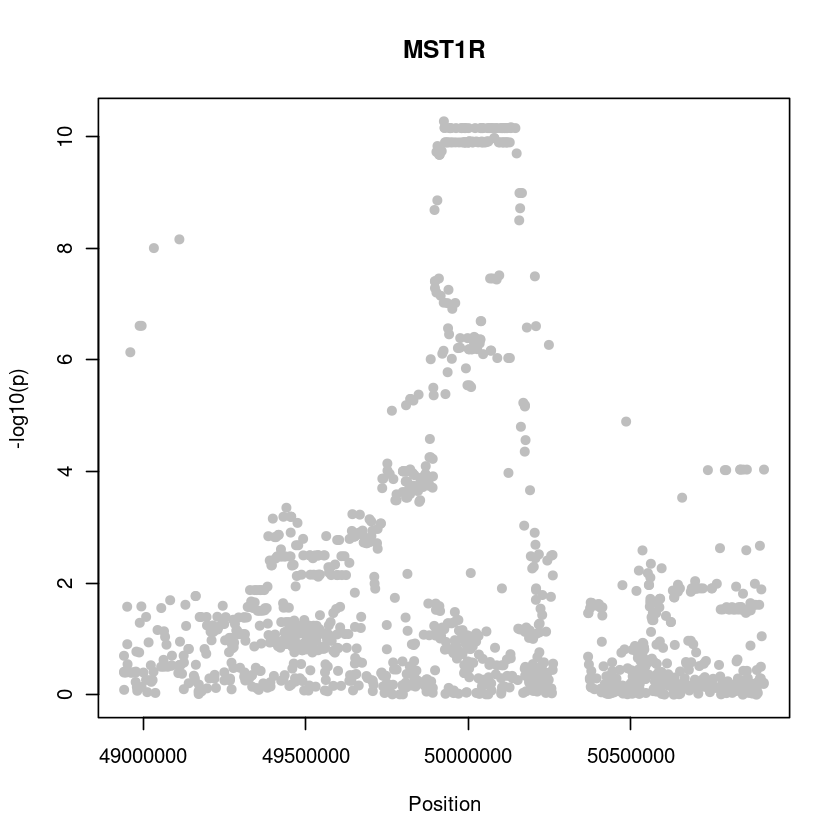

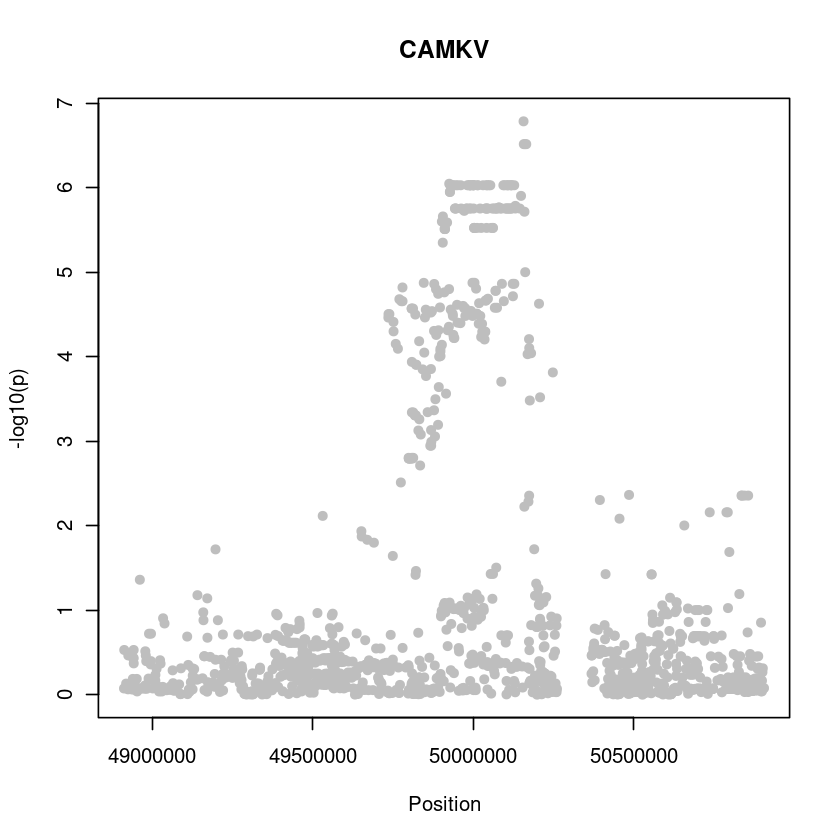

In [15]:
plot_dataset(data_mst1r, main = "MST1R")
plot_dataset(data_camkv, main = "CAMKV")

In [17]:
gwas <- fread("../../data/sumstats_filtered/iPSYCH2015_EUR_ADHD_CC.assoc", data.table = F)

In [18]:
gwas_mst1r <- gwas %>% filter(SNP %in% mst1r_snps$V1) %>% arrange(BP)
# gwas_camkv <- gwas %>% filter(SNP %in% camkv_snps$V1) %>% arrange(BP)

In [19]:
dim(gwas_mst1r)

[1] 1425   10

In [20]:
gwas_mst1r_ld <- fread("ENSG00000164078_gwas.ld", data.table = F)
colnames(gwas_mst1r_ld) <- mst1r_snps$V1
rownames(gwas_mst1r_ld) <- mst1r_snps$V1

# gwas_camkv_ld <- fread("ENSG00000164076_gwas.ld", data.table = F)
# colnames(gwas_camkv_ld) <- camkv_snps$V1
# rownames(gwas_camkv_ld) <- camkv_snps$V1

In [21]:
data_gwas_mst1r <- list("beta" = gwas_mst1r$BETA, "varbeta" = gwas_mst1r$SE*gwas_mst1r$SE, "snp" = gwas_mst1r$SNP,
                  "position" = gwas_mst1r$BP, "type" = "quant", "sdY" = 1, "LD" = as.matrix(gwas_mst1r_ld))

# data_gwas_camkv <- list("beta" = gwas_camkv$BETA, "varbeta" = gwas_camkv$SE*gwas_camkv$SE, "snp" = gwas_camkv$SNP,
#                   "position" = gwas_camkv$BP, "type" = "quant", "sdY" = 1, "LD" = as.matrix(gwas_camkv_ld))

In [22]:
check_dataset(data_gwas_mst1r, warn.minp = 1e-10)
check_dataset(data_gwas_camkv, warn.minp = 1e-10)

NULL

NULL

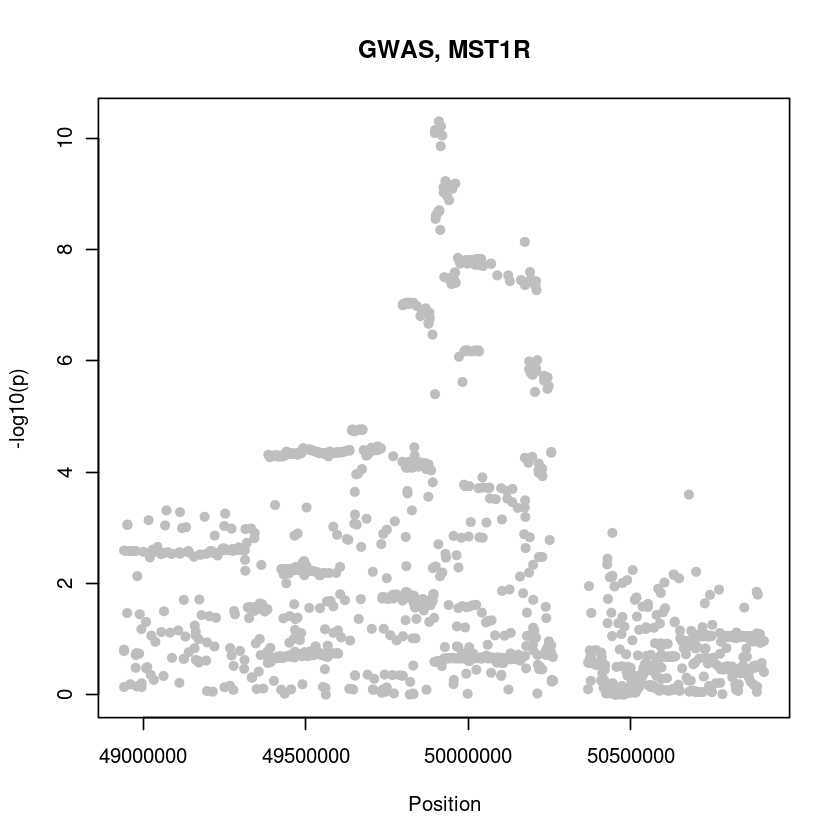

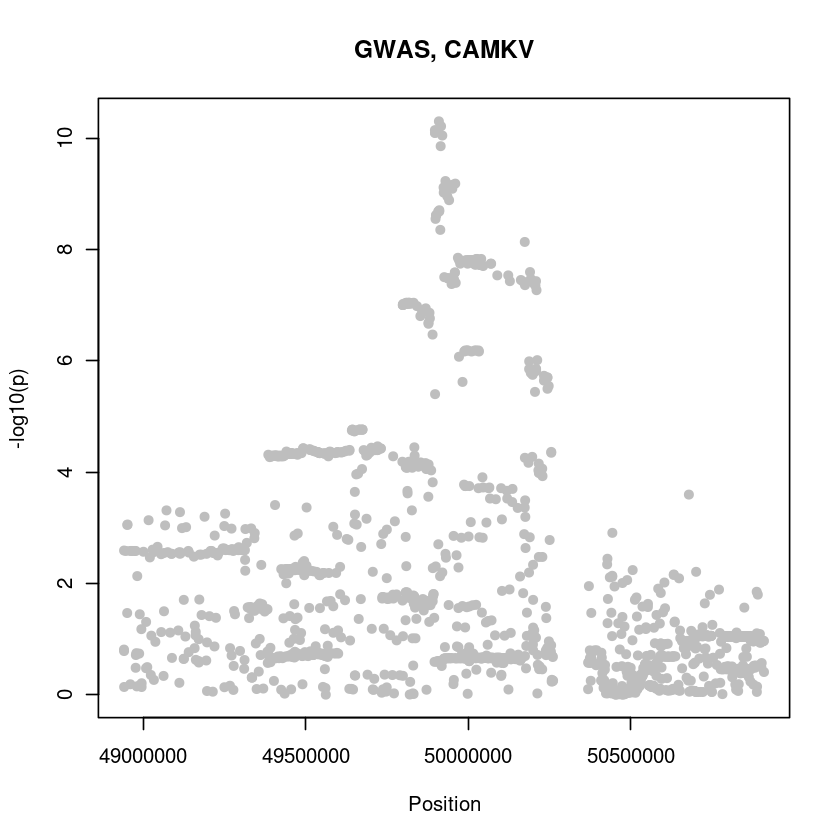

In [23]:
plot_dataset(data_gwas_mst1r, main = "GWAS, MST1R")
plot_dataset(data_gwas_mst1r, main = "GWAS, CAMKV")

### single causal variant coloc

In [22]:
mst1r.res <- coloc.abf(dataset1 = data_mst1r, dataset2 = data_gwas_mst1r)
print(mst1r.res)

PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.66e-10  6.39e-06  1.79e-05  6.86e-01  3.14e-01 
[1] "PP abf for shared variant: 31.4%"


Coloc analysis of trait 1, trait 2


SNP Priors



   p1    p2   p12 
1e-04 1e-04 1e-05 



Hypothesis Priors



       H0     H1     H2       H3      H4
 0.680458 0.1425 0.1425 0.020292 0.01425



Posterior



       nsnps           H0           H1           H2           H3           H4 
1.425000e+03 1.663309e-10 6.389642e-06 1.786095e-05 6.858189e-01 3.141569e-01 


In [56]:
str_vec <- paste0(capture.output(
  print(mst1r.res)
))

cat(paste0(
    c("SNP priors", str_vec[1], str_vec[2], 
      "Hypothesis Priors", str_vec[3], str_vec[4], 
      "Posterior", str_vec[5], str_vec[6]), collapse="\n"
))

Coloc analysis of trait 1, trait 2


SNP Priors


Hypothesis Priors


Posterior



SNP priors
   p1    p2   p12 
1e-04 1e-04 1e-05 
Hypothesis Priors
       H0     H1     H2       H3      H4
 0.680458 0.1425 0.1425 0.020292 0.01425
Posterior
       nsnps           H0           H1           H2           H3           H4 
1.425000e+03 1.663309e-10 6.389642e-06 1.786095e-05 6.858189e-01 3.141569e-01 

[1] "SNP priors"                                                                    
[2] "   p1    p2   p12 "                                                            
[3] "1e-04 1e-04 1e-05 "                                                            
[4] "Hypothesis Priors"                                                             
[5] "       H0     H1     H2       H3      H4"                                      
[6] " 0.680458 0.1425 0.1425 0.020292 0.01425"                                      
[7] "Posterior"                                                                     
[8] "       nsnps           H0           H1           H2           H3           H4 "
[9] "1.425000e+03 1.663309e-10 6.389642e-06 1.786095e-05 6.858189e-01 3.141569e-01 "

In [39]:
sink("output.txt")

# Print the output
print(mst1r.res)

# Stop the redirection and close the file
sink()

Coloc analysis of trait 1, trait 2


SNP Priors



   p1    p2   p12 
1e-04 1e-04 1e-05 



Hypothesis Priors



       H0     H1     H2       H3      H4
 0.680458 0.1425 0.1425 0.020292 0.01425



Posterior



       nsnps           H0           H1           H2           H3           H4 
1.425000e+03 1.663309e-10 6.389642e-06 1.786095e-05 6.858189e-01 3.141569e-01 


In [30]:
subset(mst1r.res$results,SNP.PP.H4 > 0.01) %>% arrange(-SNP.PP.H4)

snp,position,V.df1,z.df1,r.df1,lABF.df1,V.df2,z.df2,r.df2,lABF.df2,internal.sum.lABF,SNP.PP.H4
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
rs1317154,49910084,0.002071624,5.516323,0.9156904,12.695518,0.00014161,-6.571429,0.9937456,18.91956,31.61508,0.28449812
rs2681780,49897830,0.002048929,5.495426,0.9165369,12.597897,0.00014400,6.516667,0.9936407,18.56952,31.16742,0.18182982
rs2681781,49898273,0.002028935,5.497239,0.9172840,12.613825,0.00014400,-6.500000,0.9936407,18.46174,31.07557,0.16587214
rs2777888,49898000,0.002030386,5.446362,0.9172298,12.357987,0.00014400,-6.500000,0.9936407,18.46174,30.81973,0.12842937
rs9821675,49902544,0.002056341,5.413711,0.9162603,12.186978,0.00014400,-6.516667,0.9936407,18.56952,30.75650,0.12056058
rs9862795,49915506,0.002068458,5.389762,0.9158084,12.064575,0.00014400,-6.416667,0.9936407,17.92697,29.99154,0.05610329
rs3733135,49939587,0.002111164,5.433713,0.9142193,12.268292,0.00014161,6.151261,0.9937456,16.26344,28.53173,0.01303169
rs9843653,49920571,0.001970863,4.942380,0.9194608,9.970385,0.00014400,-6.483333,0.9936407,18.35423,28.32462,0.01059381


In [28]:
o <- order(mst1r.res$results$SNP.PP.H4, decreasing = TRUE)
cs <- cumsum(mst1r.res$results$SNP.PP.H4[o])
w <- which(cs > 0.95)[1]
mst1r.res$results[o,][1:w,]$snp

[1] "rs1317154" "rs2681780" "rs2681781" "rs2777888" "rs9821675" "rs9862795"
[7] "rs3733135"

In [31]:
camkv.res <- coloc.abf(dataset1 = data_camkv, dataset2 = data_gwas_camkv)
print(camkv.res)

PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 4.86e-08  7.71e-06  5.22e-03  8.28e-01  1.67e-01 
[1] "PP abf for shared variant: 16.7%"


Coloc analysis of trait 1, trait 2


SNP Priors



   p1    p2   p12 
1e-04 1e-04 1e-05 



Hypothesis Priors



        H0     H1     H2         H3      H4
 0.6783108 0.1434 0.1434 0.02054922 0.01434



Posterior



       nsnps           H0           H1           H2           H3           H4 
1.434000e+03 4.858180e-08 7.708744e-06 5.216815e-03 8.276138e-01 1.671616e-01 


In [32]:
subset(camkv.res$results,SNP.PP.H4 > 0.01) %>% arrange(-SNP.PP.H4)

o <- order(camkv.res$results$SNP.PP.H4, decreasing = TRUE)
cs <- cumsum(camkv.res$results$SNP.PP.H4[o])
w <- which(cs > 0.95)[1]
camkv.res$results[o,][1:w,]$snp

snp,position,V.df1,z.df1,r.df1,lABF.df1,V.df2,z.df2,r.df2,lABF.df2,internal.sum.lABF,SNP.PP.H4
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
rs1317154,49910084,0.0002097920,4.296136,0.9907620,6.800925,0.00014161,-6.571429,0.9937456,18.91956,25.72048,0.43013152
rs9843653,49920571,0.0001981563,4.061576,0.9912699,5.805703,0.00014400,-6.483333,0.9936407,18.35423,24.15994,0.09033681
rs9821675,49902544,0.0002088603,3.967866,0.9908027,5.455157,0.00014400,-6.516667,0.9936407,18.56952,24.02468,0.07890841
rs2681780,49897830,0.0002085194,3.941026,0.9908176,5.349301,0.00014400,6.516667,0.9936407,18.56952,23.91882,0.07098238
rs2777888,49898000,0.0002064854,3.924278,0.9909063,5.279868,0.00014400,-6.500000,0.9936407,18.46174,23.74161,0.05945482
rs2681781,49898273,0.0002066320,3.894154,0.9908999,5.163484,0.00014400,-6.500000,0.9936407,18.46174,23.62523,0.05292268
rs1062633,49924940,0.0002165136,4.315684,0.9904689,6.897208,0.00014161,-6.117647,0.9937456,16.05853,22.95574,0.02709492
rs6795703,49930215,0.0002003187,4.190993,0.9911755,6.339600,0.00014161,6.193277,0.9937456,16.52116,22.86076,0.02463987
rs7634084,49949834,0.0001992389,4.220280,0.9912227,6.459426,0.00014161,-6.168067,0.9937456,16.36632,22.82574,0.02379204


[1] "rs1317154"  "rs9843653"  "rs9821675"  "rs2681780"  "rs2777888" 
 [6] "rs2681781"  "rs1062633"  "rs6795703"  "rs7634084"  "rs11130224"
[11] "rs62262093" "rs9848497"  "rs2230590"  "rs11713193" "rs9862795" 
[16] "rs3774758"

Results pass decision rule H4 > 0.1



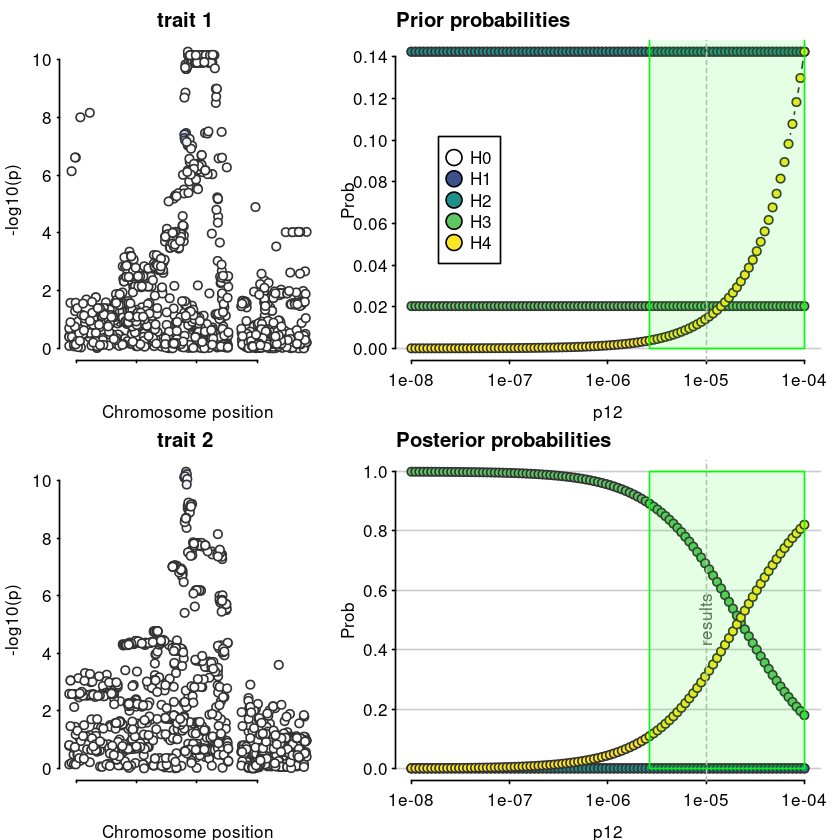

In [33]:
sensitivity(mst1r.res,"H4 > 0.1")

Results pass decision rule H4 > 0.1



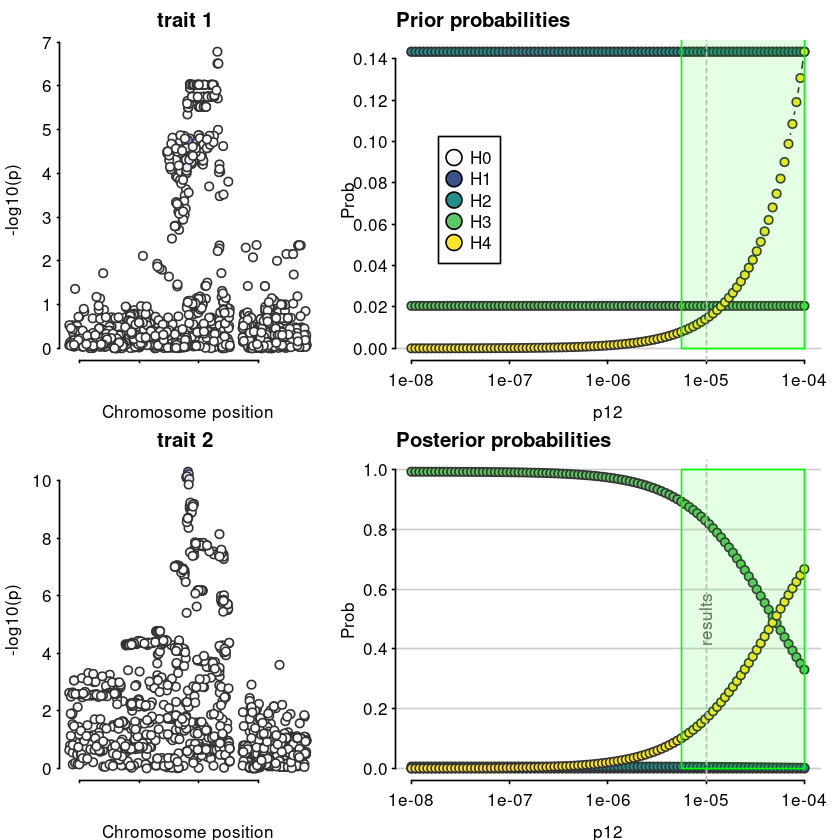

In [34]:
sensitivity(camkv.res,"H4 > 0.1")

### run susie

In [76]:
check_dataset(data_mst1r, req = "LD")
check_dataset(data_gwas_mst1r, req = "LD")
check_dataset(data_camkv, req = "LD")
check_dataset(data_gwas_camkv, req = "LD")

NULL

NULL

NULL

NULL

In [77]:
susie.mst1r <- runsusie(data_mst1r)

running max iterations: 100

Warning message in susie_suff_stat(XtX = R, Xty = z, n = 2, yty = 1, L = L, scaled_prior_variance = prior_variance, :
“IBSS algorithm did not converge in 100 iterations!”
	converged: FALSE

running max iterations: 10000

	converged: TRUE



In [78]:
susie.gwas_mst1r <- runsusie(data_gwas_mst1r)

running max iterations: 100

Warning message in susie_suff_stat(XtX = R, Xty = z, n = 2, yty = 1, L = L, scaled_prior_variance = prior_variance, :
“IBSS algorithm did not converge in 100 iterations!”
	converged: FALSE

running max iterations: 10000

	converged: TRUE



In [82]:
saveRDS(susie.mst1r, "susie.mstlr.rds")
saveRDS(susie.gwas_mst1r, "susie.gwas_mst1r.rds")

In [83]:
# tmp <- readRDS("susie.mstlr.rds")

In [35]:
susie.mst1r <- readRDS("susie.mstlr.rds")
susie.gwas_mst1r <- readRDS("susie.gwas_mst1r.rds")

In [36]:
summary(susie.mst1r)
summary(susie.gwas_mst1r)

,variable,variable_prob,cs
,<dbl>,<dbl>,<dbl>
816,816,1.0000000,7
819,819,1.0000000,9
825,825,1.0000000,10
753,753,0.8750000,1
754,754,0.8750000,1
768,768,0.8024691,2
796,796,0.8024691,2
800,800,0.8024691,2
1,1,0.0000000,-1


,variable,variable_prob,cs
,<dbl>,<dbl>,<dbl>
568,568,1,2
570,570,1,1
1,1,0,-1
2,2,0,-1
3,3,0,-1
4,4,0,-1
5,5,0,-1
6,6,0,-1
7,7,0,-1


In [85]:
if(requireNamespace("susieR",quietly=TRUE)) {
  susie.res.mst1r = coloc.susie(susie.mst1r,susie.gwas_mst1r)
  print(susie.res.mst1r$summary)
}

Using 1425/ 1425 and 1425 available



PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.00e+00  0.00e+00  0.00e+00  1.00e+00 2.67e-273 
[1] "PP abf for shared variant: 2.67e-271%"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
        0         0         0         1         0 
[1] "PP abf for shared variant: 0%"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
        0         0         0         1         0 
[1] "PP abf for shared variant: 0%"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
        0         0         0         1         0 
[1] "PP abf for shared variant: 0%"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
        0         0         0         1         0 
[1] "PP abf for shared variant: 0%"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.00e+00  0.00e+00  0.00e+00  1.00e+00 3.37e-208 
[1] "PP abf for shared variant: 3.37e-206%"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
        0         0         0         1         0 
[1] "PP abf for shared variant: 0%"
PP.H0.abf PP.H1.ab

**Check our SuSiE results**

In [39]:
fetal.susie <- fread("~/project-gandalm/isoform_twas/eqtl_new/results/susie_finemap/mixed/mixed_ciseqtl_90hcp_perm_purity_filtered.txt.gz", data.table = F)
fetal.susie.cs <- fread("~/project-gandalm/isoform_twas/eqtl_new/results/susie_finemap/mixed/mixed_ciseqtl_90hcp_perm.cred.txt.gz", data.table = F)
fetal.susie.mst1r <- fetal.susie %>% filter(phenotype_id == "ENSG00000164078")
fetal.susie.cs.mst1r <- fetal.susie.cs %>% filter(phenotype_id == "ENSG00000164078")

In [40]:
fetal.susie.cs.mst1r

phenotype_id,cs_id,cs_index,finemapped_region,cs_log10bf,cs_avg_r2,cs_min_r2,cs_size,low_purity
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<lgl>
ENSG00000164078,ENSG00000164078_L1,L1,chr3:48941305-50941305,5.960833,0.9309945,7.662277e-01,90,FALSE
ENSG00000164078,ENSG00000164078_L2,L2,chr3:48941305-50941305,1.294623,0.1685475,4.818696e-08,197,TRUE


In [42]:
fetal.susie.mst1r %>% arrange(-pip)

phenotype_id,variant_id,chr,pos,ref,alt,cs_id,cs_index,finemapped_region,pip,z,cs_min_r2,cs_avg_r2,cs_size,posterior_mean,posterior_sd,cs_log10bf
<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
ENSG00000164078,chr3_49925464_T_C,3,49925464,T,C,ENSG00000164078_L1,L1,chr3:48941305-50941305,0.02098259,7.138680,0.7662277,0.9309945,90,0.010478209,0.07251809,5.960833
ENSG00000164078,chr3_50116335_TAACTC_T,3,50116335,TAACTC,T,ENSG00000164078_L1,L1,chr3:48941305-50941305,0.01479318,7.098816,0.7662277,0.9309945,90,0.006879843,0.05689736,5.960833
ENSG00000164078,chr3_50131691_G_A,3,50131691,G,A,ENSG00000164078_L1,L1,chr3:48941305-50941305,0.01479318,7.098816,0.7662277,0.9309945,90,0.006879843,0.05689736,5.960833
ENSG00000164078,chr3_49927503_G_T,3,49927503,G,T,ENSG00000164078_L1,L1,chr3:48941305-50941305,0.01476380,7.094599,0.7662277,0.9309945,90,0.007009103,0.05802611,5.960833
ENSG00000164078,chr3_49927722_A_C,3,49927722,A,C,ENSG00000164078_L1,L1,chr3:48941305-50941305,0.01476380,7.094599,0.7662277,0.9309945,90,0.007009103,0.05802611,5.960833
ENSG00000164078,chr3_49943200_G_A,3,49943200,G,A,ENSG00000164078_L1,L1,chr3:48941305-50941305,0.01279901,7.093220,0.7662277,0.9309945,90,0.005729087,0.05099469,5.960833
ENSG00000164078,chr3_49944461_G_A,3,49944461,G,A,ENSG00000164078_L1,L1,chr3:48941305-50941305,0.01279901,7.093220,0.7662277,0.9309945,90,0.005729087,0.05099469,5.960833
ENSG00000164078,chr3_49946812_G_A,3,49946812,G,A,ENSG00000164078_L1,L1,chr3:48941305-50941305,0.01279901,7.093220,0.7662277,0.9309945,90,0.005729087,0.05099469,5.960833
ENSG00000164078,chr3_49962641_A_G,3,49962641,A,G,ENSG00000164078_L1,L1,chr3:48941305-50941305,0.01279901,7.093220,0.7662277,0.9309945,90,0.005729087,0.05099469,5.960833


**rs1317154 not in CS**

In [43]:
fetal.susie.mst1r %>% filter(pos == 49910084)

phenotype_id,variant_id,chr,pos,ref,alt,cs_id,cs_index,finemapped_region,pip,z,cs_min_r2,cs_avg_r2,cs_size,posterior_mean,posterior_sd,cs_log10bf
<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>


In [86]:
susie.camkv <- runsusie(data_camkv)

running max iterations: 100

Warning message in susie_suff_stat(XtX = R, Xty = z, n = 2, yty = 1, L = L, scaled_prior_variance = prior_variance, :
“IBSS algorithm did not converge in 100 iterations!”
	converged: FALSE

running max iterations: 10000

	converged: TRUE



In [87]:
susie.gwas_camkv <- runsusie(data_gwas_camkv)

running max iterations: 100

Warning message in susie_suff_stat(XtX = R, Xty = z, n = 2, yty = 1, L = L, scaled_prior_variance = prior_variance, :
“IBSS algorithm did not converge in 100 iterations!”
	converged: FALSE

running max iterations: 10000

	converged: TRUE



In [88]:
summary(susie.camkv)
summary(susie.gwas_camkv)

,variable,variable_prob,cs
,<dbl>,<dbl>,<dbl>
828,828,1.0000000,5
831,831,1.0000000,9
837,837,1.0000000,10
765,765,0.8750000,1
766,766,0.8750000,1
780,780,0.8024691,2
808,808,0.8024691,2
812,812,0.8024691,2
1,1,0.0000000,-1


,variable,variable_prob,cs
,<dbl>,<dbl>,<dbl>
580,580,1,2
582,582,1,1
1,1,0,-1
2,2,0,-1
3,3,0,-1
4,4,0,-1
5,5,0,-1
6,6,0,-1
7,7,0,-1


In [89]:
saveRDS(susie.camkv, "susie.camkv.rds")
saveRDS(susie.gwas_camkv, "susie.gwas_camkv.rds")

In [90]:
if(requireNamespace("susieR",quietly=TRUE)) {
  susie.res.camkv = coloc.susie(susie.camkv,susie.gwas_camkv)
  print(susie.res.camkv$summary)
}

Using 1434/ 1434 and 1434 available



PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.00e+00  0.00e+00  0.00e+00  1.00e+00 4.87e-241 
[1] "PP abf for shared variant: 4.87e-239%"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
        0         0         0         1         0 
[1] "PP abf for shared variant: 0%"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
        0         0         0         1         0 
[1] "PP abf for shared variant: 0%"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
        0         0         0         1         0 
[1] "PP abf for shared variant: 0%"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
        0         0         0         1         0 
[1] "PP abf for shared variant: 0%"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 0.00e+00  0.00e+00  0.00e+00  1.00e+00 1.02e-189 
[1] "PP abf for shared variant: 1.02e-187%"
PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
        0         0         0         1         0 
[1] "PP abf for shared variant: 0%"
PP.H0.abf PP.H1.ab